In [4]:
from TensorflowUtils.DataSet import LocalInpaintingDataSet
from TensorflowUtils.Inpainting.masks import generate_square_mask
from TensorflowUtils.VisualTools import print_samples
from KerasGAN.losses import w_dist
from ImageMetrics.losses import LSSIM, L3SSIM, LPSNRB
from ImageMetrics.metrics import SSIM, SSIM3, PSNRB
from pandas import DataFrame, read_csv
from matplotlib import pyplot as plt

import numpy as np

In [2]:
data_set = LocalInpaintingDataSet(generate_square_mask)
data_set.normalize()

(16, 3.2)


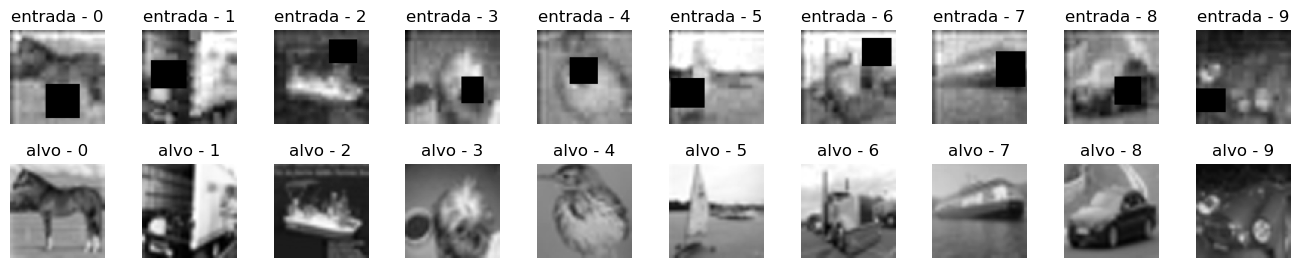

In [3]:
rng = np.random.default_rng(12345)
samples = rng.integers(size = [10], low = 0, high = 10_000)

image_stack = [data_set.x_train[samples], data_set.y_train[samples]]

print_samples(image_stack, ["entrada", "alvo"])

## Callbacks

In [9]:
inputs = np.load("Logs/rafael_cifar_10_64x64_compressed_Norm/G-AutoEncoder-0.0-64x64_D-Teste1/3/input_samples.npy")
outputs = np.load("Logs/rafael_cifar_10_64x64_compressed_Norm/G-AutoEncoder-0.0-64x64_D-Teste1/3/output_samples.npy")
samples = np.load("Logs/rafael_cifar_10_64x64_compressed_Norm/G-AutoEncoder-0.0-64x64_D-Teste1/3/samples_idx.npy")
targets = data_set.y_test[samples]
to_plot = [inputs, outputs[0], outputs[5], outputs[29], targets]

(16, 8.0)


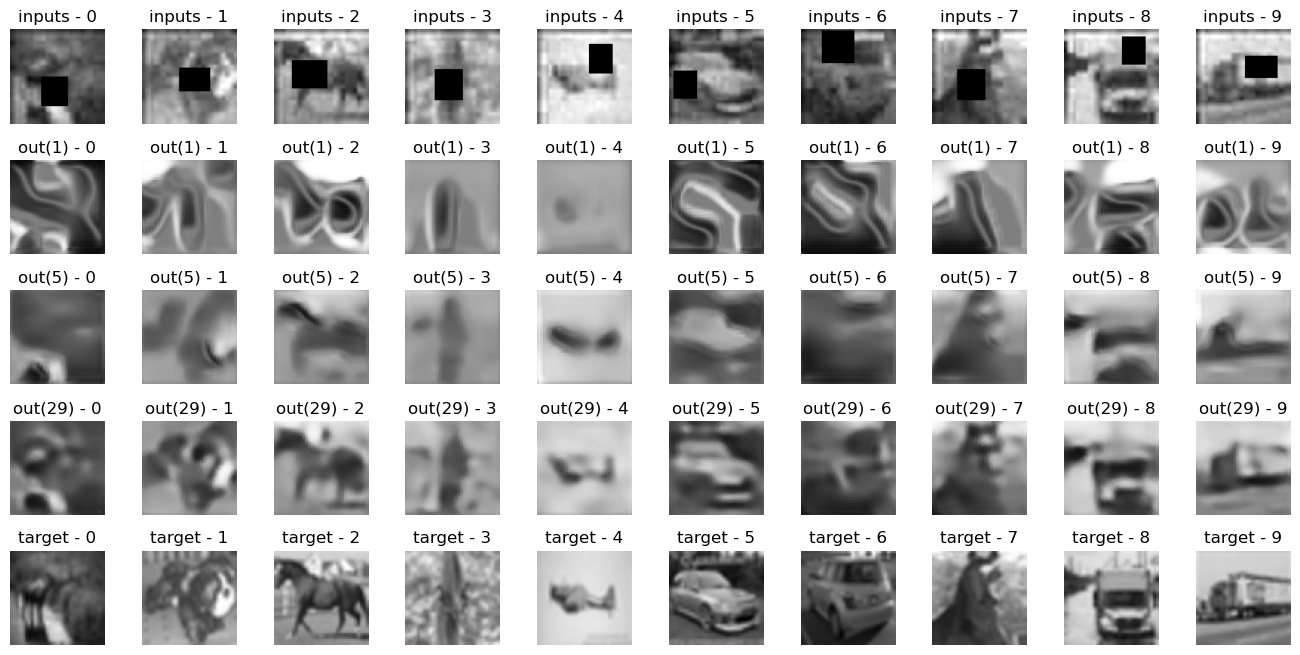

In [10]:
print_samples(to_plot, ['inputs', 'out(1)', 'out(5)', 'out(29)', 'target'], save_name="test3.png")

In [5]:
results = read_csv("Logs/rafael_cifar_10_64x64_compressed_Norm/G-AutoEncoder-0.0-64x64_D-Teste1/3/metrics_epoch_means.csv")

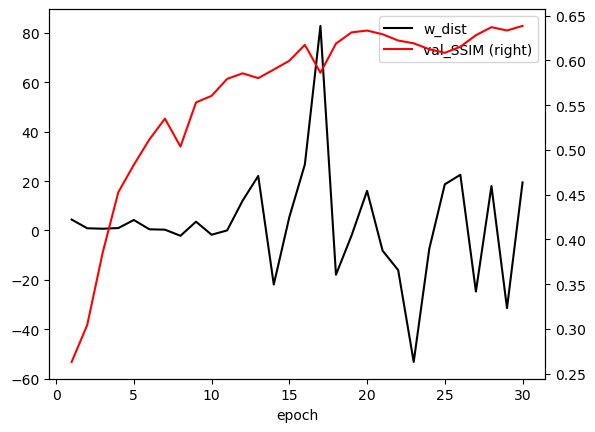

In [20]:
ax = plt.gca()

results.plot(kind='line',
        x='epoch',
        y='w_dist',
        color='black', ax=ax)

results.plot(secondary_y = True,
        kind='line',
        x='epoch',
        y='val_SSIM',
        color='red', ax =ax)
plt.savefig("w_dist_ssim_x_epoch")
plt.show()